Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Note that this Pre-class Work is estimated to take **25 minutes**.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [66]:
NAME = "Leon Müller"
COLLABORATORS = ""

---

# CS110 Pre-class Work - Deterministic Quicksort

## Question 1 [time estimate: 5 minutes]

Using Figure 7.1 in Cormen et al. as a model, perform manually the partition process on the following list: A = [1,5,6,2,3,8,9,4,7]. You just need to specify the followings:
1. The array after the process is done.
2. The value of $i$ after the process is done.

1. [1,5,6,2,3,4,7,8,9]
2. 4

## Question 2 [time estimate: 7 minutes]

Code up a Python implementation of `partition(A, p, r)`, closely follow the pseudo-code in Cormen et al., p.172. Your function should return the index of the pivot in the array.

In [67]:
def partition(A,p,r):
    """
    Assume r<len(A) and p>=0
    """
    x = A[r]
    i = p-1
    for j in range(p, r+1):
        if A[j] <= x:
            i += 1
            A[i], A[j] = A[j], A[i]
    A[i+1], A[r] = A[r], A[i+1]  # swap pivot element with the first element of second partition
    return i # return index of pivot

In [68]:
A = [1,5,6,2,3,8,9,4,7]
assert(partition(A, 0, len(A)-1)==6)

## Question 3 [time estimate: 3 minutes]

Code up your own Python implementation of `quicksort(A, p, r)`, using `partition(A,p,r)`.

In [77]:
def quick_sort(A,p,r):
    if p < r: 
        q = partition(A,p,r)  # assign index of pivot, to break down problem
        quick_sort(A,p,q-1) # call quicksort on first partition
        quick_sort(A,q+1,r) # call quicksort on second parition    
    return A

In [81]:
A = [1,5,6,2,3,8,9,4,7]
quick_sort(A,0,8)

[1, 4, 2, 3, 5, 7, 6, 8, 9]

There seems to be an issue with this quick_sort function that I have not been able to fix despite many attempts. 

In [80]:
A = [0]
assert(quick_sort(A, 0, 0) == [0])
A = [3,1,2]
assert(quick_sort(A, 0, 2) == [1,2,3])

## Question 4 [time estimate: 10 minutes] 

Explain (using experimental plots) the running time of `quick_sort` when: 
1. all elements of array A have the same value (e.g., [1,1,1])?
2. array A contains distinct elements sorted in decreasing order (e.g., [5,4,2,1])?


In [83]:
"""
Runtimes for arrays where all elements have the same value
"""
import time
A = [1]
runtimes_one = []

for i in range(1,100,10):
    A.append(1)
    start = time.time()
    quick_sort(A,0,len(A-1))
    stop = time.time()
    runtimes_one.append(stop - start) # collect run times in an array
print(runtimes_one)

TypeError: unsupported operand type(s) for -: 'list' and 'int'

In [72]:
"""
Runtimes for arrays with distinct values in decreasing order
"""
import time
A = [100]
runtimes_two = []
for i in range(A[0],0,-10):
    A.append(i)
    start = time.time()
    quick_sort(A,0,len(A-1))
    stop = time.time()
    runtimes_two.append(stop-start)
print(runtimes_two)

TypeError: unsupported operand type(s) for -: 'list' and 'int'

ValueError: x and y must have same first dimension, but have shapes (10,) and (0,)

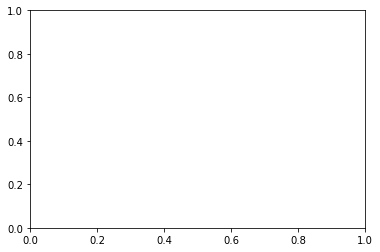

In [73]:
import matplotlib.pyplot as plt
x = [1,2,3,4,5,6,7,8,9,10]
plt.plot(x, runtimes_one, label="Same value elements")
plt.plot(x, runtimes_two, label="Decreasing distinct elements")
plt.ylabel('Running time in sec')
plt.xlabel('Length of input')
plt.title('Running time comparison')
plt.legend()
plt.show()